# Session

In [2]:
import numpy as np

Consider a given vector, how to add 1 to each element indexed by a second vector (be careful with repeated indices)? (Hint: checkout np.bincount function)

In [4]:
v = np.ones(10)
print(v)
i = np.random.randint(0,len(v),20)
print(i)
v += np.bincount(i, minlength=len(v))
print(v)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[3 4 7 4 5 7 9 3 9 1 8 5 9 0 1 8 8 3 6 7]
[ 2.  3.  1.  4.  3.  3.  2.  4.  4.  4.]


Considering a four dimensions array, how to get sum over the last two axis at once?

In [5]:
a = np.random.randint(0,10,(3,4,3,4))
print(a)
result = a.reshape(a.shape[:-2] + (-1,)).sum(axis=-1)
print(result)

[[[[0 3 0 8]
   [2 7 6 9]
   [8 4 0 7]]

  [[2 0 5 3]
   [9 6 8 3]
   [9 7 6 1]]

  [[9 0 1 6]
   [6 4 9 3]
   [0 3 2 8]]

  [[8 3 6 2]
   [7 8 6 2]
   [2 0 9 2]]]


 [[[1 3 3 9]
   [9 1 9 0]
   [7 6 2 8]]

  [[2 4 4 5]
   [8 3 8 1]
   [0 9 0 6]]

  [[1 5 1 9]
   [0 1 6 2]
   [0 8 1 5]]

  [[0 3 5 5]
   [8 1 5 2]
   [5 2 4 9]]]


 [[[9 3 1 5]
   [3 8 8 4]
   [1 7 8 3]]

  [[2 6 6 8]
   [6 3 6 1]
   [2 2 8 3]]

  [[3 3 3 7]
   [4 3 1 1]
   [4 3 3 6]]

  [[9 6 1 6]
   [4 9 6 5]
   [5 3 1 9]]]]
[[54 59 51 55]
 [58 50 39 49]
 [60 53 41 64]]


How to get the diagonal of a dot product? (Hint: there different ways to do that and they have different execution time)

In [8]:
size = 100
A = np.random.randn(size,size)
B = np.random.randn(size,size)

%timeit -n 100 np.diag(np.dot(A, B))
%timeit -n 100 np.sum(A * B.T, axis=1)
%timeit -n 100 np.einsum("ij,ji->i", A, B)

100 loops, best of 3: 228 µs per loop
100 loops, best of 3: 40.1 µs per loop
100 loops, best of 3: 13.3 µs per loop


Consider an array Z = [1,2,3,4,5,6,7,8,9,10,11,12,13,14], how to generate an array R = [[1,2,3,4], [2,3,4,5], [3,4,5,6], ..., [11,12,13,14]]? (Hint: checkout stride_tricks.as_strided function)

In [13]:
from numpy.lib.stride_tricks import as_strided
a = np.arange(1,15)
print(a)
result = as_strided(a,(11,4),(4,4))
print(result)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[[ 1  2  3  4]
 [ 2  3  4  5]
 [ 3  4  5  6]
 [ 4  5  6  7]
 [ 5  6  7  8]
 [ 6  7  8  9]
 [ 7  8  9 10]
 [ 8  9 10 11]
 [ 9 10 11 12]
 [10 11 12 13]
 [11 12 13 14]]


Consider a 16x16 array, how to get the block-sum (block size is 4x4)?

In [19]:
a = np.ones((16,16))
print(a)
k = 4
result = np.add.reduceat(np.add.reduceat(a, np.arange(0, a.shape[0], k), axis=0),\
                         np.arange(0, a.shape[1], k), axis=1)
print(result)

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. 

Create a structured array with x and y coordinates covering the [0,1]x[0,1] area. (Hint: checkout np.linspace and np.meshgrid functions).

In [29]:
from matplotlib import pyplot as plt
a = np.zeros((10,10), [('x',float),('y',float)])
a['x'], a['y'] = np.meshgrid(np.linspace(0,1,10), np.linspace(0,1,10))
print(a)

[[( 0.        ,  0.        ) ( 0.11111111,  0.        )
  ( 0.22222222,  0.        ) ( 0.33333333,  0.        )
  ( 0.44444444,  0.        ) ( 0.55555556,  0.        )
  ( 0.66666667,  0.        ) ( 0.77777778,  0.        )
  ( 0.88888889,  0.        ) ( 1.        ,  0.        )]
 [( 0.        ,  0.11111111) ( 0.11111111,  0.11111111)
  ( 0.22222222,  0.11111111) ( 0.33333333,  0.11111111)
  ( 0.44444444,  0.11111111) ( 0.55555556,  0.11111111)
  ( 0.66666667,  0.11111111) ( 0.77777778,  0.11111111)
  ( 0.88888889,  0.11111111) ( 1.        ,  0.11111111)]
 [( 0.        ,  0.22222222) ( 0.11111111,  0.22222222)
  ( 0.22222222,  0.22222222) ( 0.33333333,  0.22222222)
  ( 0.44444444,  0.22222222) ( 0.55555556,  0.22222222)
  ( 0.66666667,  0.22222222) ( 0.77777778,  0.22222222)
  ( 0.88888889,  0.22222222) ( 1.        ,  0.22222222)]
 [( 0.        ,  0.33333333) ( 0.11111111,  0.33333333)
  ( 0.22222222,  0.33333333) ( 0.33333333,  0.33333333)
  ( 0.44444444,  0.33333333) ( 0.55555556,  0

# HW

Generate a generic 2D Gaussian-like array (Hint: checkout np.linspace function). Visualize the results.

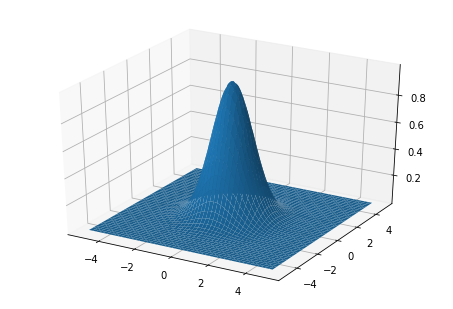

In [53]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X, Y = np.meshgrid(np.linspace(-5,5,1000), np.linspace(-5,5,1000))
D = np.sqrt(X*X+Y*Y)
sigma, mu = 1.0, 0.0
G = np.exp(-( (D-mu)**2 / ( 2.0 * sigma**2 ) ) )
#print(G)

fig = plt.figure()
axe = Axes3D(fig)

axe.plot_surface(X, Y, G)
plt.show()

How to tell if a given 2D array has null columns?

In [46]:
a = np.random.randint(0,3,(3,10))
print(a)
print((~a.any(axis=0)).any())

[[0 1 2 2 2 2 1 0 1 2]
 [2 1 1 0 2 2 2 0 0 1]
 [2 1 1 0 1 0 2 2 2 0]]
False


Consider the vector [1, 2, 3, 4, 5], how to build a new vector with 3 consecutive zeros interleaved between each value?

In [44]:
Z = np.array([1,2,3,4,5])
nz = 3
Z_new = np.zeros(len(Z) + (len(Z)-1)*(nz))
Z_new[::nz+1] = Z
print(Z_new)

[ 1.  0.  0.  0.  2.  0.  0.  0.  3.  0.  0.  0.  4.  0.  0.  0.  5.]


Considering a 15x5 matrix, extract rows with unequal values (e.g. [1,2,2,3,4]).

In [43]:
a = np.random.randint(0,2,(10,5))
i = np.logical_and.reduce(Z[:,1:] == Z[:,:-1], axis=1)
result = a[~i]
print(a)
print(result)

[[1 0 0 1 0]
 [1 1 0 1 1]
 [0 1 0 0 1]
 [1 1 0 0 1]
 [1 1 0 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 1 1]
 [1 0 0 1 0]
 [0 0 1 1 0]]
[[1 0 0 1 0]
 [1 1 0 1 1]
 [0 1 0 0 1]
 [1 1 0 0 1]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 1 1]
 [1 0 0 1 0]
 [0 0 1 1 0]]


Given an arbitrary number of vectors, build the cartesian product

In [ ]:
from itertools import product
x = np.random.randn(3, 3)
print(x)
print([y for y in product(*x.T)])

Consider a random vector with shape (100,2) representing coordinates, find point by point distances.

In [37]:
Z = np.random.random((10,2))
X,Y = np.atleast_2d(Z[:,0]), np.atleast_2d(Z[:,1])
print('X:')
print(X, X.shape)
print('Y:')
print(Y,Y.shape)
print('Let the broadcasting do the work:')
print(X-X.T)
%timeit D = np.sqrt( (X-X.T)**2 + (Y-Y.T)**2)
print(D)

X:
[[ 0.78271409  0.93405558  0.11973362  0.03125763  0.99647853  0.30129347
   0.99479522  0.68455398  0.1246984   0.25745162]] (1, 10)
Y:
[[ 0.22882457  0.53343562  0.65359584  0.44597031  0.94944852  0.54265735
   0.75028918  0.73980367  0.93390719  0.4146335 ]] (1, 10)
Let the broadcasting do the work:
[[ 0.          0.15134148 -0.66298048 -0.75145647  0.21376444 -0.48142062
   0.21208113 -0.09816011 -0.65801569 -0.52526247]
 [-0.15134148  0.         -0.81432196 -0.90279795  0.06242296 -0.63276211
   0.06073964 -0.2495016  -0.80935717 -0.67660396]
 [ 0.66298048  0.81432196  0.         -0.08847599  0.87674492  0.18155985
   0.87506161  0.56482037  0.00496479  0.13771801]
 [ 0.75145647  0.90279795  0.08847599  0.          0.96522091  0.27003584
   0.96353759  0.65329635  0.09344078  0.22619399]
 [-0.21376444 -0.06242296 -0.87674492 -0.96522091  0.         -0.69518506
  -0.00168331 -0.31192455 -0.87178013 -0.73902691]
 [ 0.48142062  0.63276211 -0.18155985 -0.27003584  0.69518506  0.
 